<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_week8_NN_image_classification_allMarkdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 371: Data Mining Applications

## Week 8: Neural Networks for Image Classification with Keras, Tensorflow, and PyTorch
### Charles Dorner, EdD (Candidate)
### College of Computing and Informatics, Drexel University

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras

# Image Classification
- Image classification is a fundamental task in computer vision where an algorithm assigns labels to images based on their content.
- Automatically categorize images into predefined classes (e.g., "cat," "dog," "car").

## Image Data as a Multi-Dimensional Array
Images are typically represented as multi-dimensional arrays (tensors). The structure of these arrays depends on the image type and color format.

- Grayscale Image (2D Array): A grayscale image has only one channel (intensity values).
- Shape: (height, width)

```
# load the keras CIFAR dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
```

In [2]:
# load the keras CIFAR dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


```
# Retriev an image
aimage = X_train[100]
aimage.shape
```

In [3]:
aimage = X_train[100]
aimage.shape

(32, 32, 3)

```
# View the original image 32x32x3
plt.figure(figsize=(1,1))
plt.imshow(aimage)
plt.show()
```

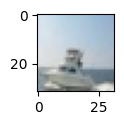

In [4]:
plt.figure(figsize=(1,1))
plt.imshow(aimage)
plt.show()

```
# Retrieve only one channel 32x32
gray_image = aimage[:,:, 0]
gray_image.shape
```

In [5]:
gray_image = aimage[:,:, 0]
gray_image.shape

(32, 32)

```
gray_image
```

array([[213, 211, 211, ..., 151, 151, 149],
       [214, 212, 212, ..., 152, 152, 151],
       [216, 214, 213, ..., 153, 153, 151],
       ...,
       [145, 136, 143, ..., 216, 196, 183],
       [139, 129, 129, ..., 227, 223, 209],
       [137, 143, 136, ..., 209, 217, 228]], dtype=uint8)
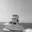

In [6]:
gray_image

```
# plot the one channel image
plt.imshow(gray_image, cmap='gray')
plt.show()
```

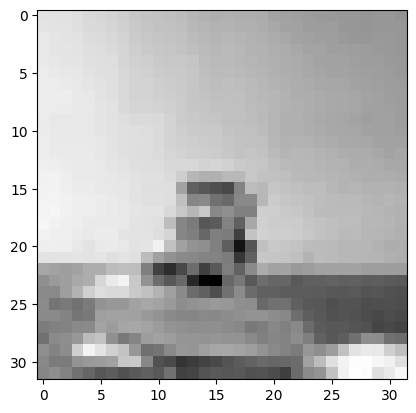

In [7]:
plt.imshow(gray_image, cmap='gray')
plt.show()

- RGB Image (3D Array): A color image has three channels: Red, Green, and Blue (RGB).
- Shape: (height, width, 3)

```
# show the 32x32x3 data
aimage
```

array([[[213, 229, 242],
        [211, 227, 240],
        [211, 227, 240],
        ...,
        [151, 174, 206],
        [151, 174, 206],
        [149, 172, 204]],

       [[214, 229, 241],
        [212, 227, 239],
        [212, 227, 239],
        ...,
        [152, 175, 207],
        [152, 175, 207],
        [151, 174, 205]],

       [[216, 229, 239],
        [214, 227, 237],
        [213, 227, 237],
        ...,
        [153, 176, 206],
        [153, 176, 206],
        [151, 174, 204]],

       ...,

       [[145, 159, 165],
        [136, 148, 154],
        [143, 152, 158],
        ...,
        [216, 217, 206],
        [196, 197, 191],
        [183, 183, 182]],

       [[139, 153, 159],
        [129, 142, 148],
        [129, 139, 145],
        ...,
        [227, 228, 219],
        [223, 224, 219],
        [209, 209, 209]],

       [[137, 152, 157],
        [143, 155, 161],
        [136, 145, 152],
        ...,
        [209, 209, 203],
        [217, 217, 213],
        [228, 228, 226]]], dtype=uint8)
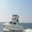

In [8]:
aimage

```
plt.imshow(aimage)
plt.show()
```

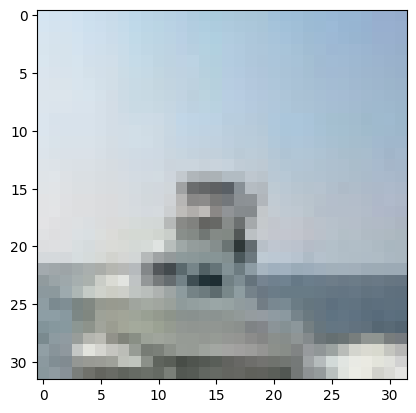

In [9]:
plt.imshow(aimage)
plt.show()

- Batch of Images (4D Tensor): When processing multiple images in deep learning, they are stored in batch form.
- Shape: (batch_size, height, width, channels)


```
X_train.shape
```

In [10]:
X_train.shape

(50000, 32, 32, 3)

## Image Classification by Logistic Regression
- Let us consider a binary classification problem.
- To classify an image into (yes, no) labels.
- A (height, width, channels) image is flatten to a 1-D vector.
- A linear combination of the pixels followed by the logistic function gives rise to the classification.

![](https://i.imgur.com/3dfiaKI.png)





# Introduction to Artificial Neural Network

- An Artificial Neural Network (ANN) is a computational model inspired by the structure and function of the human brain.
- It consists of layers of interconnected artificial neurons that process and learn from data to recognize patterns, make predictions, and solve complex problems.
- Each neuron is just an extension of logistic regression.

![](https://i.imgur.com/7yrbeiU.png)

## Key Components of ANN:
- Neurons (Nodes): Basic units that receive input, process it, and pass output.
- Layers:
 - Input Layer: Takes raw data as input.
 - Hidden Layers: Perform computations and extract patterns.
 - Output Layer: Produces the final result or prediction.
 - Weights & Biases: Parameters that adjust during training to improve accuracy.
 - Activation Functions: Determine the output of a neuron (e.g., Sigmoid, ReLU, Tanh).
 - Learning Process: Uses algorithms like Backpropagation and Gradient Descent to update weights based on errors.


 ![](https://i.imgur.com/MZ75NgI.png)

# A Single Neuron and Logistic Regression

- A single neuron is just an extension of logistic regression, which itself is just an extension of linear regression.
- If the inputs are represented by the variables $x_1, x_2, ..., x_i$, and the weights controlling the influence of these inputs is represented by $w_1, w_2, ..., w_i$ then the equation for linear regression is:

$$y=w_1x_1 + w_2x_2 + ... + w_ix_i$$

- For logistic regression, we can modify this one step further, by passing the entire output through the logistic function $f(z)=\frac{1}{1+e^{-z}}$.
- As a result, the output is between 0 and 1 as computed by the following equation:

$$y=f(w_1x_1 + w_2x_2 + ... + w_ix_i)$$

- For example, the following neuron shows:
 * three inputs ($x_1, x_2, x_3$)
 * three weights ($w_1, w_2, w_3$)
 * an output: $y=f(w_1x_1 + w_2x_2 + w_3x_3)$

 ![logistic regression](https://i.imgur.com/uCB4OcQ.png)



## Activation Function
- Activation functions are simply a function that is applied to the weighed sum of a neuron.
- A list of some common activation functions and their graphs can be seen below.

 - Relu (Rectified Linear Unit):

  ![](https://yashuseth.files.wordpress.com/2018/02/relu-function.png?w=309&h=274)
 - Tanh (Hyperbolic Tangent):

 ![](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)
 - Sigmoid:

 ![](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)



## Retrieval Practice

## Loss/Cost Function
- A loss/cost function is responsible for determining how well the network preformed.
- Some common loss/cost functions include.
 - Mean Squared Error:
 $$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
where $ y_i $ is the actual value, $ \hat{y}_i $ is the predicted value, and $ n $ is the number of data points.

 - Mean Absolute Error:
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
where $ y_i $ is the actual value, $ \hat{y}_i $ are as above.
 - Hinge Loss:
$$
\text{Hinge Loss} = \frac{1}{n} \sum_{i=1}^{n} \max(0, 1 - y_i\cdot \hat{y}_i)
$$
where $ y_i $ is the true label $(\pm 1$) and $ \hat{y}_i $ is the predicted score.
 - Binary Cross-Entropy (Log Loss)}:
 For binary classification, where $ y \in \{0,1\} $, the loss function is given by:
$$
\text{Log Loss} = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log \hat{y}_i + (1 - y_i) \log (1 - \hat{y}_i) \right]
$$
where: $ y_i $ is the true label (0 or 1), $ \hat{y}_i $ is the predicted probability for class 1, $ n $ is the number of samples.

  - Categorical Cross-Entropy: For multi-class classification with $ C $ classes, the cross-entropy loss is:
$$
\text{Categorical Log Loss} = - \frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{C} y_{i,j} \log \hat{y}_{i,j}
$$
where: $ y_{i,j} $ is 1 if the true class of sample $ i $ is $ j $, otherwise 0, $\hat{y}_{i,j}$ is the predicted probability for class $ j $, $ C $ is the total number of classes.

## Training a Neural Network
- Typically, gradient descent is applied to learning the weights and biases of a neural network:
 1. Randomly initialize the weights of the neurons to small values.
 2. Choose a loss function (some measure of how poorly our model is predicting the training data)
 3. Calculate the model's loss on the training data
 4. Update the weights in the direction that reduces loss (using calculus)
 5. Repeat steps 3 and 4 until we're happy with the network's performance



## Gradient Descent for Log Loss $L$

Let the predicted probability be:
$$
\hat{y}_i = \sigma (w^T x_i) = \frac{1}{1 + e^{-w^T x_i}}
$$
where $ \sigma(z) $ is the sigmoid function.

The gradient of the loss function with respect to the weights $ w $ is:
$$
\frac{\partial L}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) x_i
$$

## Gradient Descent Update Rule
Using the gradient descent algorithm, the weights are updated as:
$$
w := w - \alpha \frac{\partial L}{\partial w}
$$
where $ \alpha $ is the learning rate.

Expanding the update rule:
$$
w := w - \alpha \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) x_i
$$

![](https://cdn-images-1.medium.com/max/1000/1*iU1QCnSTKrDjIPjSAENLuQ.png)


## Backpropagation
- An algorithm which is used to train artificial neural networks by adjusting the weights to minimize the error.
- It works by propagating the error backward from the output layer to the input layer, updating weights using gradient descent.

## Retrieval Practice

## Use Keras for Classification

```
import numpy as np
import keras
import matplotlib.pyplot as plt
```

In [11]:
import numpy as np
import keras
import matplotlib.pyplot as plt

```
 # Load the data and split it between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
```

In [12]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


```
X_train.shape
```

In [13]:
X_train.shape

(60000, 28, 28)

```
X_train[0].min(), X_train[0].max()
```

In [14]:
X_train[0].min(), X_train[0].max()

(np.uint8(0), np.uint8(255))

```
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
```

In [15]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

```
X_train[0].min(), X_train[0].max()
```

In [16]:


X_train[0].min(), X_train[0].max()



(np.float32(0.0), np.float32(1.0))

```
# Plot random 4x4 MNIST images
grid_size=(4, 4)
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(8, 8))
indices = np.random.choice(X_train.shape[0], grid_size[0] * grid_size[1], replace=False)

for ax, idx in zip(axes.flat, indices):
    ax.imshow(X_train[idx], cmap='gray')
    ax.set_xticks([])  # Remove x ticks
    ax.set_yticks([])  # Remove y ticks
    ax.set_xlabel(f"Label: {y_train[idx]}", fontsize=10)  # Show label below image


plt.tight_layout()
plt.show()
```

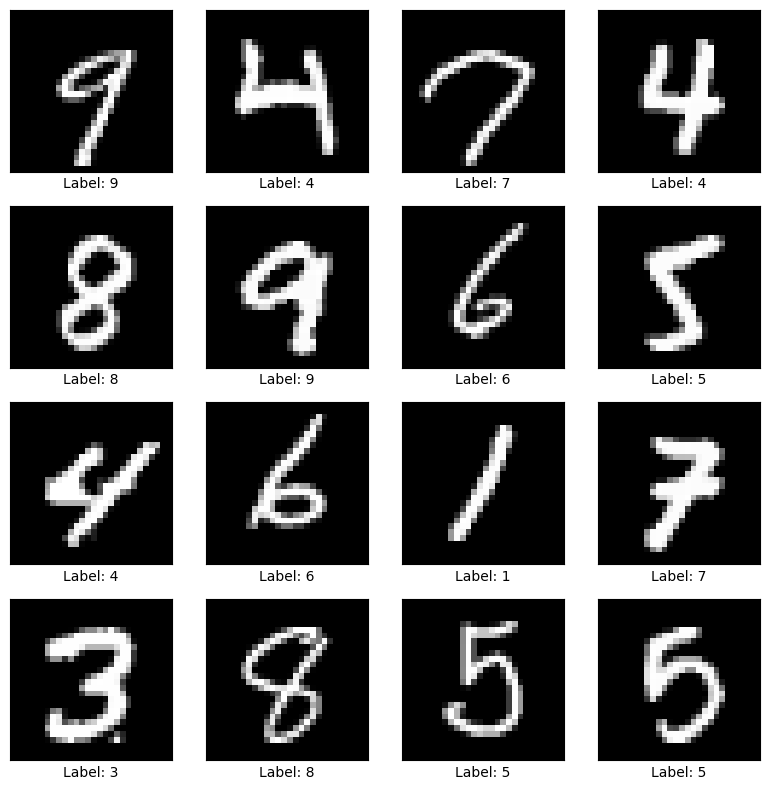

In [17]:
grid_size=(4, 4)
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(8, 8))
indices = np.random.choice(X_train.shape[0], grid_size[0] * grid_size[1], replace=False)

for ax, idx in zip(axes.flat, indices):
    ax.imshow(X_train[idx], cmap='gray')
    ax.set_xticks([])  # Remove x ticks
    ax.set_yticks([])  # Remove y ticks
    ax.set_xlabel(f"Label: {y_train[idx]}", fontsize=10)  # Show label below image


plt.tight_layout()
plt.show()

```
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")
```

In [19]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


```
# Model parameters
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential([
    keras.layers.Input(shape=input_shape),
    keras.layers.Flatten(),  # Flatten the 28x28 image into a 1D vector
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),  # Regularization to prevent overfitting
    keras.layers.Dense(num_classes, activation="softmax")  # Output layer for classification
])

# Print model summary
model.summary()
```

In [20]:
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential([
    keras.layers.Input(shape=input_shape),
    keras.layers.Flatten(),  # Flatten the 28x28 image into a 1D vector
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),  # Regularization to prevent overfitting
    keras.layers.Dense(num_classes, activation="softmax")  # Output layer for classification
])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

```
# Compile the NN
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)
```

In [21]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)

```
batch_size = 128
epochs = 5

model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15
)
score = model.evaluate(X_test, y_test, verbose=0)
```

In [22]:


batch_size = 128
epochs = 5

model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15
)
score = model.evaluate(X_test, y_test, verbose=0)



Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - acc: 0.8169 - loss: 0.5934 - val_acc: 0.9647 - val_loss: 0.1119
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - acc: 0.9637 - loss: 0.1287 - val_acc: 0.9740 - val_loss: 0.0863
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - acc: 0.9761 - loss: 0.0815 - val_acc: 0.9731 - val_loss: 0.0886
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - acc: 0.9827 - loss: 0.0621 - val_acc: 0.9783 - val_loss: 0.0830
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - acc: 0.9884 - loss: 0.0391 - val_acc: 0.9807 - val_loss: 0.0750


```
score
```

In [23]:
score

[0.07661537826061249, 0.9776999950408936]

```
predictions = model.predict(X_test)
```

In [24]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


```
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
accuracy_score(y_test, predictions.argmax(axis=1))
```

In [25]:


from sklearn.metrics import accuracy_score, precision_recall_fscore_support
accuracy_score(y_test, predictions.argmax(axis=1))



0.9777

```
precision_recall_fscore_support(y_test, predictions.argmax(axis=1))
```

In [26]:


precision_recall_fscore_support(y_test, predictions.argmax(axis=1))



(array([0.98868313, 0.99204947, 0.97866149, 0.97532083, 0.96865521,
        0.98183882, 0.97122302, 0.98609732, 0.96741344, 0.96568627]),
 array([0.98061224, 0.98942731, 0.97771318, 0.97821782, 0.97556008,
        0.96973094, 0.98643006, 0.96595331, 0.97535934, 0.97621407]),
 array([0.98463115, 0.99073666, 0.97818711, 0.97676718, 0.97209538,
        0.97574732, 0.97876748, 0.97592138, 0.97137014, 0.97092164]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

## Retrieval Practice

## Convoluational Neural Network
- Uses convolutional layers to extract spatial features, followed by pooling layers to reduce dimensions.
- Designed for 2D/3D structured data like images, videos, or volumetric data.
- Automatically extracts spatial and hierarchical features using filters/kernels.
- Preserves local spatial structures using convolution operations.

```
import matplotlib.animation as animation
from scipy.signal import convolve2d

# Create a 6×6 input image (example)
image = np.random.rand(6, 6)

#image = np.array([
#    [1, 1, 1, 1, 1, 0],
#    [0, 0, 0, 0, 1, 0],
#    [0, 0, 1, 1, 1, 0],
#    [0, 0, 0, 0, 1, 0],
#    [0, 0, 0, 0, 1, 0],
#    [1, 1, 1, 1, 1, 0],
#])

# Define a 3×3 filter (edge detection example)
kernel = np.array([
    [1,  0, -1],
    [1,  0, -1],
    [1,  0, -1]
])

# Perform 2D convolution
feature_map = convolve2d(image, kernel, mode="valid")

feature_map
```

In [27]:


import matplotlib.animation as animation
from scipy.signal import convolve2d

# Create a 6×6 input image (example)
image = np.random.rand(6, 6)

# image = np.array([
#    [1, 1, 1, 1, 1, 0],
#    [0, 0, 0, 0, 1, 0],
#    [0, 0, 1, 1, 1, 0],
#    [0, 0, 0, 0, 1, 0],
#    [0, 0, 0, 0, 1, 0],
#    [1, 1, 1, 1, 1, 0],
# ])

# Define a 3×3 filter (edge detection example)
kernel = np.array([
    [1,  0, -1],
    [1,  0, -1],
    [1,  0, -1]
])

# Perform 2D convolution
feature_map = convolve2d(image, kernel, mode="valid")

feature_map



array([[ 0.37335817,  1.34299221,  0.69945437, -0.68607223],
       [-0.07429823,  0.84922963,  0.2184171 , -0.47748364],
       [ 0.17259983,  0.21695716,  0.20573246, -0.28258731],
       [ 0.22742789, -0.76114152, -0.73007217,  0.15019771]])

```
# Animation setup
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Initialize images
ax1, ax2 = axes
img1 = ax1.imshow(image, cmap="gray", interpolation="none")
img2 = ax2.imshow(feature_map, cmap="gray", interpolation="none")

ax1.set_title("Original Image")
ax2.set_title("Feature Map")

# Disable axis ticks
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

# Highlight the sliding filter (kernel) position
kernel_size = 2
rect = plt.Rectangle((0, 0), kernel_size, kernel_size, edgecolor="red", facecolor="none", linewidth=2)
ax1.add_patch(rect)

# Update function for animation
def update(frame):
    row = frame // (image.shape[1] - kernel_size)
    col = frame % (image.shape[1] - kernel_size)

    # Update rectangle position
    rect.set_xy((col, row))

    return img1, img2, rect

# Number of steps in the convolution (valid mode: 4x4 output feature map)
num_steps = feature_map.shape[0] * feature_map.shape[1]

# Create animation
ani = animation.FuncAnimation(fig, update, frames=num_steps, interval=500, blit=False)

# Save animation
animation_path = "convolution_animation.gif"
ani.save(animation_path, writer="pillow", fps=2)

```

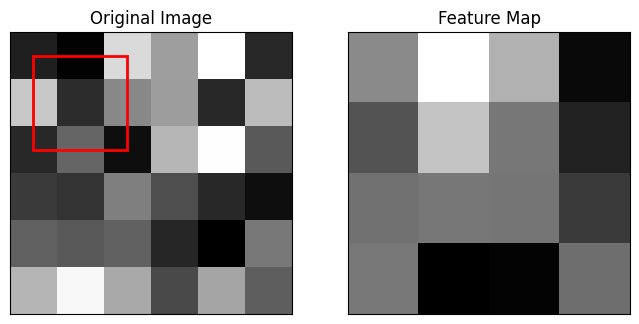

In [28]:
# Animation setup
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Initialize images
ax1, ax2 = axes
img1 = ax1.imshow(image, cmap="gray", interpolation="none")
img2 = ax2.imshow(feature_map, cmap="gray", interpolation="none")

ax1.set_title("Original Image")
ax2.set_title("Feature Map")

# Disable axis ticks
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

# Highlight the sliding filter (kernel) position
kernel_size = 2
rect = plt.Rectangle((0, 0), kernel_size, kernel_size, edgecolor="red", facecolor="none", linewidth=2)
ax1.add_patch(rect)

# Update function for animation
def update(frame):
    row = frame // (image.shape[1] - kernel_size)
    col = frame % (image.shape[1] - kernel_size)

    # Update rectangle position
    rect.set_xy((col, row))

    return img1, img2, rect

# Number of steps in the convolution (valid mode: 4x4 output feature map)
num_steps = feature_map.shape[0] * feature_map.shape[1]

# Create animation
ani = animation.FuncAnimation(fig, update, frames=num_steps, interval=500, blit=False)

# Save animation
animation_path = "convolution_animation.gif"
ani.save(animation_path, writer="pillow", fps=2)

```
# Model parameters
num_classes = 10
input_shape = (28, 28, 1)

model_cnn = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
```

In [29]:


# Model parameters
num_classes = 10
input_shape = (28, 28, 1)

model_cnn = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)



```
# Compile the CNN
model_cnn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)
```

In [30]:


# Compile the CNN
model_cnn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)



```
batch_size = 128
epochs = 1

model_cnn.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15
)
```

In [31]:


batch_size = 128
epochs = 1

model_cnn.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15
)



399/399 ━━━━━━━━━━━━━━━━━━━━ 338s 842ms/step - acc: 0.5672 - loss: 1.2230 - val_acc: 0.9646 - val_loss: 0.1236


```
predictions_cnn = model_cnn.predict(X_test)
```

In [32]:
predictions_cnn = model_cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step


```
precision_recall_fscore_support(y_test, predictions_cnn.argmax(axis=1))
```

In [33]:


precision_recall_fscore_support(y_test, predictions_cnn.argmax(axis=1))



(array([0.97931748, 0.99377224, 0.91415525, 0.96278159, 0.98659794,
        0.968     , 0.97584034, 0.96042471, 0.98297872, 0.95098039]),
 array([0.96632653, 0.98414097, 0.96996124, 0.97326733, 0.97454175,
        0.94955157, 0.9697286 , 0.96789883, 0.9486653 , 0.96134787]),
 array([0.97277863, 0.98893316, 0.94123178, 0.96799606, 0.98053279,
        0.95868704, 0.97277487, 0.96414729, 0.96551724, 0.95613603]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

## Retrieval Practice

## Challenges and Factors in Neural Network Applications

### Number of Hidden Layers

- For many problems, you can begin with a single hidden layer and get reasonable results.
- An MLP with just one hidden layer can theoretically model even the most complex functions, provided it has enough neurons.
- For complex problems, deep networks have a much higher parameter efficiency than shallow ones: they can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data.

To understand why, suppose you are asked to draw a forest using some drawing software, but you are forbidden to copy and paste anything. It would take an enormous amount of time: you would have to draw each tree individually, branch by branch, leaf by leaf. If you could instead draw one leaf, copy and paste it to draw a branch, then copy and paste that branch to create a tree, and finally copy and paste this tree to make a forest, you would be finished in no time. Real-world data is often structured in such a hierarchical way, and deep neural networks automatically take advantage of this fact: lower hidden layers model low-level structures (e.g., line segments of various shapes and orientations), intermediate hidden layers combine these low-level structures to model intermediate-level structures (e.g., squares, circles), and the highest hidden layers and the output layer combine these intermediate structures to model high-level structures (e.g., faces).

Not only does this hierarchical architecture help DNNs converge faster to a good solution, but it also improves their ability to generalize to new datasets. For example, if you have already trained a model to recognize faces in pictures and you now want to train a new neural network to recognize hairstyles, you can kickstart the training by reusing the lower layers of the first network. Instead of randomly initializing the weights and biases of the first few layers of the new neural network, you can initialize them to the values of the weights and biases of the lower layers of the first network. This way the network will not have to learn from scratch all the low-level structures that occur in most pictures; it will only have to learn the higher-level structures (e.g., hairstyles). This is called *transfer learning*.

In summary, for many problems you can start with just one or two hidden layers and the neural network will work just fine. For instance, you can easily reach above 97% accuracy on the MNIST dataset using just one hidden layer with a few hundred neurons, and above 98% accuracy using two hidden layers with the same total number of neurons, in roughly the same amount of training time. For more complex problems, you can ramp up the number of hidden layers until you start overfitting the training set. Very complex tasks, such as large image classification or speech recognition, typically require networks with dozens of layers (or even hundreds, but not fully connected ones), and they need a huge amount of training data. You will rarely have to train such networks from scratch: it is much more common to reuse parts of a pretrained state-of-the-art network that performs a similar task. Training will then be a lot faster and require much less data.


### Number of Neurons per Hidden Layer

- The number of neurons in the input and output layers is determined by the type of input and output your task requires. - For example, the MNIST task requires 28 × 28 = 784 input neurons and 10 output neurons.

As for the hidden layers, it used to be common to size them to form a pyramid, with fewer and fewer neurons at each layer—the rationale being that many low-level features can coalesce into far fewer high-level features. A typical neural network for MNIST might have 3 hidden layers, the first with 300 neurons, the second with 200, and the third with 100. However, this practice has been largely abandoned because it seems that using the same number of neurons in all hidden layers performs just as well in most cases, or even better; plus, there is only one hyperparameter to tune, instead of one per layer. That said, depending on the dataset, it can sometimes help to make the first hidden layer bigger than the others.

Just like the number of layers, you can try increasing the number of neurons gradually until the network starts overfitting. But in practice, it’s often simpler and more efficient to pick a model with more layers and neurons than you actually need, then use early stopping and other regularization techniques to prevent it from overfitting.

Vincent Vanhoucke, a scientist at Google, has dubbed this the “stretch pants” approach: instead of wasting time looking for pants that perfectly match your size, just use large stretch pants that will shrink down to the right size. With this approach, you avoid bottleneck layers that could ruin your model. On the flip side, if a layer has too few neurons, it will not have enough representational power to preserve all the useful information from the inputs (e.g., a layer with two neurons can only output 2D data, so if it processes 3D data, some information will be lost). No matter how big and powerful the rest of the network is, that information will never be recovered.

### Learning Rate, Batch Size, and Other Hyperparameters

- The numbers of hidden layers and neurons are not the only hyperparameters you can tweak in an MLP. Here are some of the most important ones, as well as tips on how to set them:


* **Learning rate**    
The learning rate is arguably the most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges). One way to find a good learning rate is to train the model for a few hundred iterations, starting with a very low learning rate (e.g., $10^{-5}$) and gradually increasing it up to a very large value (e.g., $10$). This is done by multiplying the learning rate by a constant factor at each iteration to go from $10^{-5}$ to $10$ in $500$ iterations). If you plot the loss as a function of the learning rate (using a log scale for the learning rate), you should see it dropping at first. But after a while, the learning rate will be too large, so the loss will shoot back up: the optimal learning rate will be a bit lower than the point at which the loss starts to climb (typically about $10$ times lower than the turning point). You can then reinitialize your model and train it normally using this good learning rate.
        
            

* **Optimizer**    
Choosing a better optimizer than plain old Mini-batch Gradient Descent (and tuning its hyperparameters) is also quite important.

    
* **Batch size**    
The batch size can have a significant impact on your model’s performance and training time. The main benefit of using large batch sizes is that hardware accelerators like GPUs can process them efficiently, so the training algorithm will see more instances per second. Therefore, many researchers and practitioners recommend using the largest batch size that can fit in GPU RAM. There’s a catch, though: in practice, large batch sizes often lead to training instabilities, especially at the beginning of training, and the resulting model may not generalize as well as a model trained with a smaller batch size. One strategy is to try to use a large batch size, using learning rate warmup, and if training is unstable or the final performance is disappointing, then try using a small batch size instead.
    
    
* **Activation function**    
In general, the `ReLU` activation function will be a good default for all hidden layers. For the output layer, it really depends on your task.

    
* **Number of iterations**    
In most cases, the number of training iterations does not actually need to be tweaked: just use early stopping instead.

For more best practices regarding tuning neural network hyperparameters, check out the excellent [2018 paper](https://arxiv.org/abs/1803.09820) by Leslie Smith.

## Retrieval Practice

```

```